##### [ 이미지 변형 - & ROI ]
- ROI : 관심영역 설정
    * 이미지 객체가 아닌 일부 관심되는 부분만 지정하느 것
    * 방법 
        + numpy slicing
        + cv2 함수 : cv2.selectROI() / cv2.selectROIs()
    

[1] 모듈 로딩 및 데디터 준비 <HR>

In [4]:
## 모듈 로딩
import numpy as np
import cv2
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [5]:
## 데이터 파일
data_file = '../Data/Image/flower.jpg'

In [6]:
## 데이터 로딩 및 기본 정보 출력
img      = cv2.imread(data_file)
img_rgb  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(f'로딩 image정보 : {img_rgb.shape}') if img_rgb is not None else print("이미지 없음")

로딩 image정보 : (321, 380, 3)


In [4]:
##[2-1] 영역설정
## 좌표설정
x,y,w,h = 50, 50, 150, 150

## ROI 영역 설정
img_roi = img_rgb[y:y+h, x:x+w].copy()

In [5]:
## [2-2] 이미지 표시
cv2.rectangle(img_rgb, (x,y), (x+w, y+h), (0,0,255), 10)

array([[[234, 233, 239],
        [234, 233, 239],
        [234, 233, 239],
        ...,
        [235, 235, 235],
        [235, 235, 235],
        [235, 235, 235]],

       [[232, 232, 234],
        [231, 232, 234],
        [232, 232, 234],
        ...,
        [230, 232, 231],
        [231, 231, 231],
        [230, 232, 231]],

       [[226, 229, 222],
        [224, 229, 222],
        [226, 229, 222],
        ...,
        [227, 232, 228],
        [229, 231, 228],
        [227, 232, 228]],

       ...,

       [[ 97, 112,  73],
        [ 97, 112,  71],
        [ 98, 113,  74],
        ...,
        [143, 165, 103],
        [143, 164, 105],
        [142, 163, 104]],

       [[205, 215, 188],
        [205, 215, 188],
        [205, 215, 188],
        ...,
        [202, 219, 175],
        [203, 218, 177],
        [201, 218, 176]],

       [[211, 214, 205],
        [211, 214, 205],
        [211, 214, 205],
        ...,
        [209, 215, 201],
        [211, 215, 201],
        [209, 215, 201]]

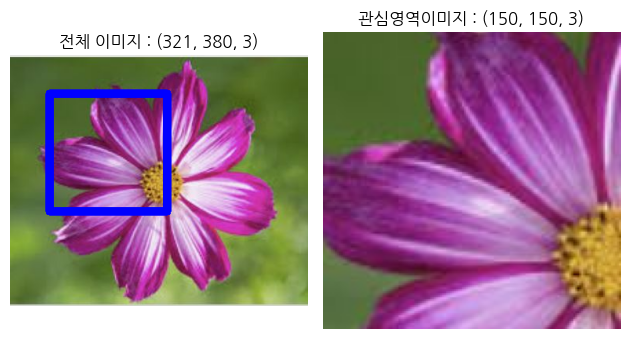

In [6]:
## [2-3] 이미지 시각화
fig, axes = plt.subplots(1,2)

titles = ['전체 이미지', '관심영역이미지']
images = [img_rgb, img_roi]

for ax, title, img_data in zip(axes, titles, images):
    ax.imshow(img_data, cmap='gray')
    ax.set_title(f'{title} : {img_data.shape}')
    ax.set_axis_off()
plt.tight_layout()
plt.show()

In [7]:
## [3-1] 현재 이미지 원본 크기 설정

## 데이터 로딩 및 기본 정보 출력
## 데이터 로딩 및 기본 정보 출력
img      = cv2.imread(data_file)
img_rgb  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
H, W = img_rgb.shape[:2]
print(f'로딩 image정보 : {img_rgb.shape}') if img_rgb is not None else print("이미지 없음")

로딩 image정보 : (321, 380, 3)


In [8]:
## [3-2] 가운데 이미지 자르기
crop_size = 80
center_x, center_y = W//2, H//2
x1 = center_x - crop_size//2
x2 = center_x + crop_size//2
y1 = center_y - crop_size//2
y2 = center_y + crop_size//2

print(f'cneter : ({center_x}, {center_y}), p1=({x1},{y1}), p2=({x2},{y2})')

cropped = img_rgb[y1:y2, x1:x2].copy()

cneter : (190, 160), p1=(150,120), p2=(230,200)


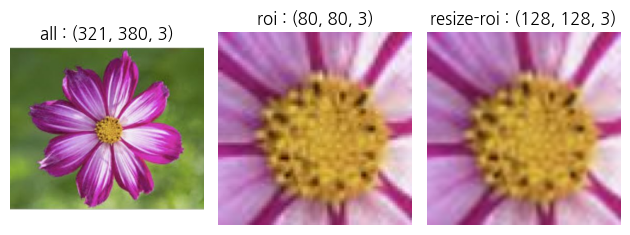

In [9]:
## ===============================================================
## [3-3] 크롭 후 리사이징
## -> 픽셀은 많아졌지만 '새 정보가 생긴 건 아님' (부드럽게 늘어난 느낌)
## imshow() : 이미지를 축 크기에 맞게/ 칸 크기에 맞게
##            자동으로 확대/축소해서 출력
## ===============================================================
resized = cv2.resize(cropped, (128, 128), interpolation=cv2.INTER_LINEAR)

## 이미지 시각화
_, axes = plt.subplots(1,3)
img_datas = [img_rgb, cropped, resized]
titles = ['all', 'roi', 'resize-roi']
for ax, data, title in zip(axes, img_datas, titles) :
    ax.imshow(data)
    ax.set_title(f'{title} : {data.shape}')
    ax.set_axis_off()
plt.tight_layout()
plt.show()

[4] ROI함수 활용 <hr>

In [10]:
## ============================================
## [4-1] 현재 이미지 원본 크기 정보
## ============================================
##[2-1] 영역설정
## 좌표설정
x,y,w,h = cv2.selectROI("img1" , img_rgb, False)
if w and h :
    roi = img[y:y+h, x:x+w]
    cv2.imshow('cropped', roi)
    cv2.moveWindow('cropped', 0, 0)
    cv2.imwrite('./cropped2.jpg', roi)

# cv2.imshow('img2', img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()




In [11]:
## ==============================================
## [4-3] 
## ==============================================
sel_images = cv2.selectROIs('img_rgb', img, False)
print(f'sel_img : {len(sel_images)}개')

cnt = 0
for x, y, w, h in sel_images :
    if w and h :
        cnt += 1
        roi = img[y:y+h, x:x+w]
        
        cv2.imshow(f'ROI_{cnt:02}', roi)
        cv2.moveWindow('ROI', 10*cnt, 0)
        cv2.imwrite(f'./roi_{cnt:02}.jpg', roi)
        
cv2.waitKey()
cv2.destroyAllWindows()

sel_img : 3개


In [ ]:
## 함수이름 : get_roi_img
## 매개변수 : 폴더명
## 반환결과 : roi 이미지 저장, 저장 개수
import os
import cv2

def get_roi_img(dirname, savedir='../Data/save'):
    save_cnt = 0 

    files = os.listdir(dirname)

    for filename in files:
        file_path = f'{dirname}/{filename}'
        save_path = f'{savedir}/{filename}'

        img = cv2.imread(file_path)
        if img is None:
            continue

        x, y, w, h = cv2.selectROI('img_rgb', img, False)
        roi = img[y:y+h, x:x+w]

        ret = cv2.imwrite(save_path, roi)
        if not ret:
            print(f'{filename} : x')
        else:
            save_cnt += 1

        cv2.destroyAllWindows()

    return save_cnt


get_roi_img('../Data/Image')

error: OpenCV(4.12.0) D:\bld\libopencv_1765885681928\work\modules\imgcodecs\src\loadsave.cpp:1146: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


: 